In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,The 86,2015
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [15]:
c=cast[(cast.character=="Superman") | (cast.character=="Batman")]
c=c.groupby(['year', 'character']).size().unstack().fillna(0)
len(c[c.Superman > c.Batman])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [16]:
c=cast[(cast.character=="Superman") | (cast.character=="Batman")]
c=c.groupby(['year', 'character']).size().unstack().fillna(0)
len(c[c.Superman < c.Batman])

24

In [17]:
c=cast[(cast.character=="Superman") | (cast.character=="Batman")]
c=c.groupby(['year', 'character']).size().unstack().fillna(0)
len(c[c.Superman == c.Batman])

11

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

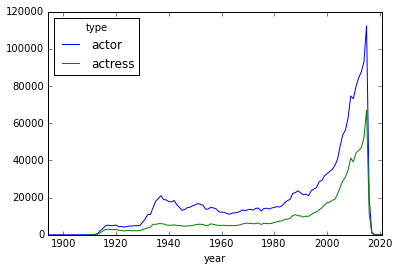

In [22]:
cast.groupby(['year', 'type']).size().unstack().plot()


### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

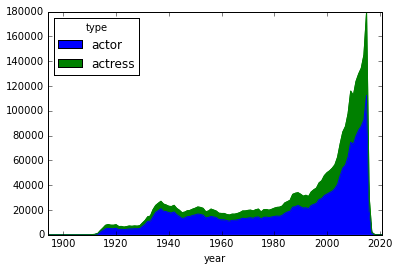

In [23]:
cast.groupby(['year', 'type']).size().unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

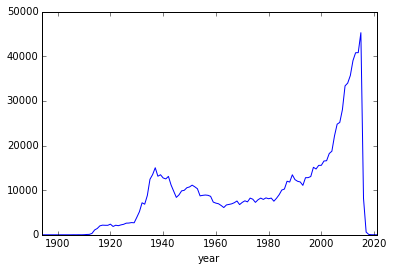

In [28]:
c=cast.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor-c.actress).plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

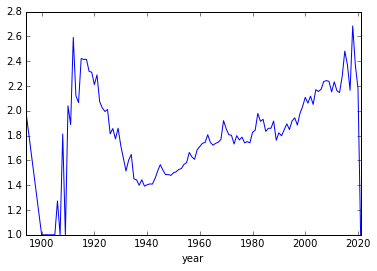

In [29]:
c=cast.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor/(c.actor-c.actress)).plot()


### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

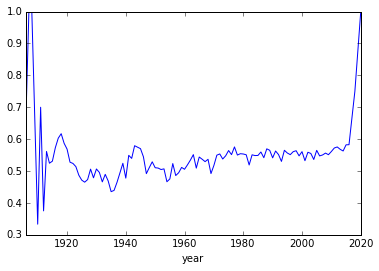

In [55]:
c=cast[cast.n ==2]
c=c.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor/(c.actor+c.actress)).plot()


### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [61]:
c=cast[cast.n <= 3]
c=c.groupby(['year', 'type', 'n']).size()
c=c.unstack(['type']).fillna(0)
(c.actor/(c.actor+c.actress)).unstack('n')#.plot()

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.000000
1907,1.000000,1.000000,1.000000
1908,1.000000,1.000000,1.000000
1909,1.000000,NaN,NaN
1910,0.400000,0.333333,1.000000
1911,0.653846,0.700000,0.833333
1912,0.555556,0.375000,0.736842
1913,0.616541,0.561404,0.750000
1914,0.612637,0.524540,0.705502


In [63]:
c=cast[cast.n <= 3]
c=c.groupby(['year', 'type', 'n']).size()
type(c)

pandas.core.series.Series